## 

参考资料：https://blog.csdn.net/Koala_Tree/article/details/78725881

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Survived = 1 表示幸存

In [4]:
import pandas as pd

train_data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')

### 对幸存者的分布有一个了解

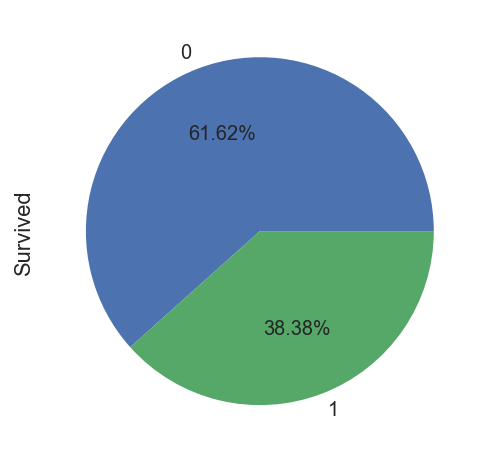

In [5]:
train_data['Survived'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

### 缺失值处理

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


可以看出 Embarked 差两条记录，用众数去填充它。

In [17]:
train_data.Embarked.dropna().mode().values

array(['S'], dtype=object)

In [18]:
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values

Cabin 缺少的太多，自定义一个类。

In [19]:
train_data['Cabin'] = train_data.Cabin.fillna('U0')

年龄值缺失填充。

## 选择其它的变量，使用随机森林预测年龄

In [20]:
from sklearn.ensemble import RandomForestRegressor

# choose training data to predict age
age_df = train_data[['Age', 'Survived', 'Fare', 'Parch', 'SibSp', 'Pclass']]

age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]

# 分出空的和非空的
X = age_df_notnull.values[:, 1:]
Y = age_df_notnull.values[:, 0]

# use RandomForestRegression to train data
rfr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rfr.fit(X, Y)

predictAges = rfr.predict(age_df_isnull.values[:, 1:])

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


填充年龄字段。

In [21]:
train_data.loc[train_data['Age'].isnull(), ['Age']] = predictAges

再看一下，就没有缺失字段了。

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 看看性别对幸存的影响

In [6]:
# 下面两句效果一样
# train_data.groupby(['Sex', 'Survived'])['Sex'].count()
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

In [24]:
train_data.groupby(['Survived', 'Sex'])['Sex'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

In [29]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


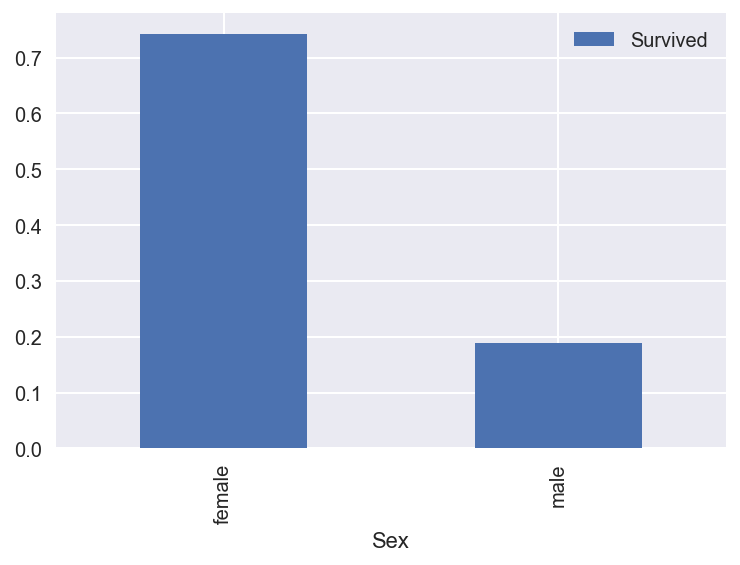

In [25]:
# 男女幸存比例
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.show()

从上图可以看出，女性幸存者比例占多数。

### 二级分组

In [31]:
train_data.groupby(['Pclass', 'Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Age, dtype: int64

In [11]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


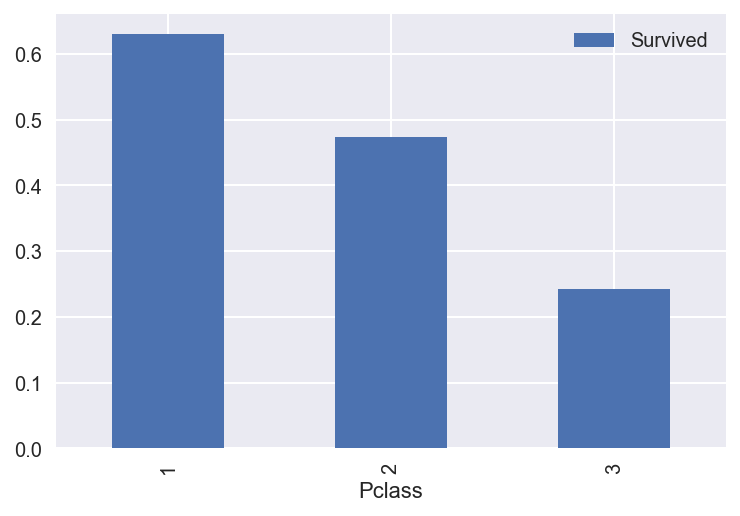

In [33]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()
plt.show()

In [35]:
# 分组以后，字段只剩下幸存 Survived 变量了
train_data[['Sex', 'Pclass', 'Survived']].groupby(['Pclass', 'Sex']).count()

Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347

In [13]:
train_data[['Sex', 'Pclass', 'Survived']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

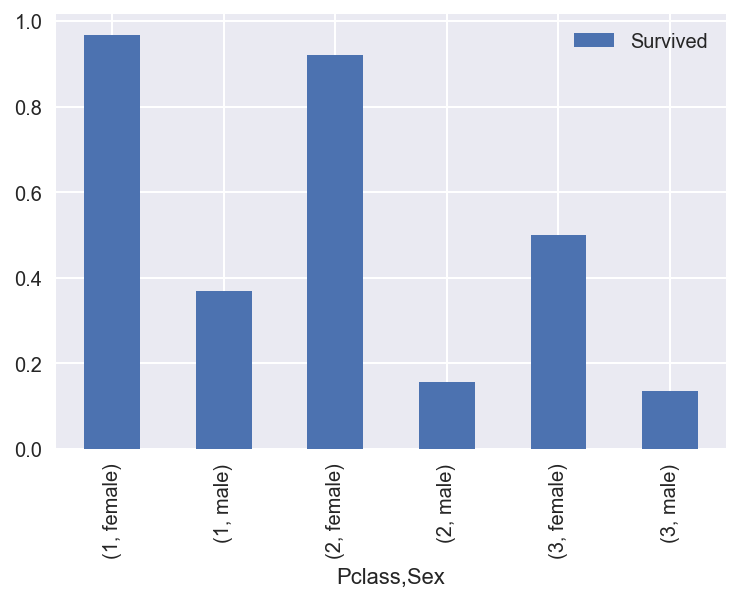

In [34]:
train_data[['Sex', 'Pclass', 'Survived']].groupby(['Pclass', 'Sex']).mean().plot.bar()
plt.show()

In [39]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

In [40]:
train_data.groupby(['Pclass', 'Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

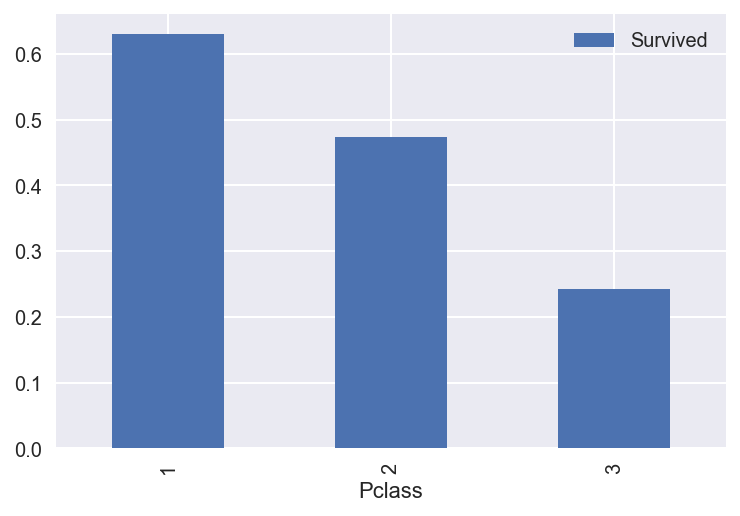

In [42]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()
plt.show()

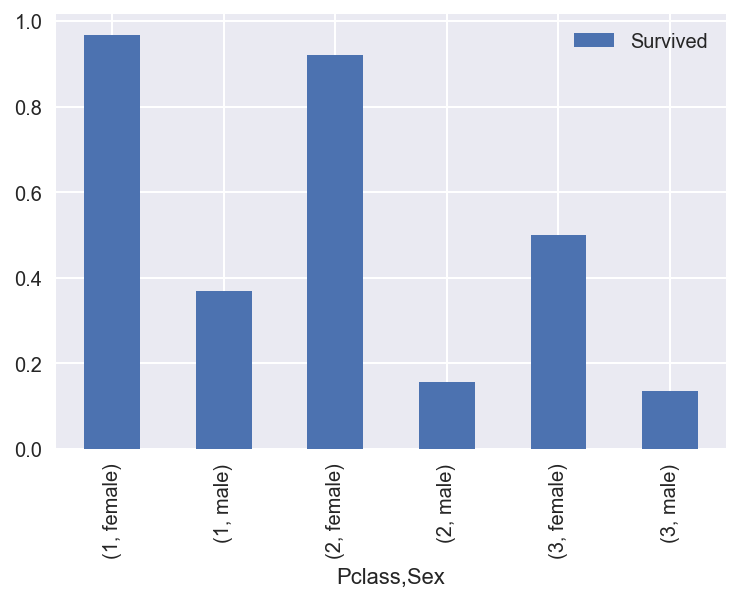

In [43]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()
plt.show()

In [45]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

## 离散型变量，针对连续型变量，看分布

### 绘制多张子图，使用小提琴图看分布

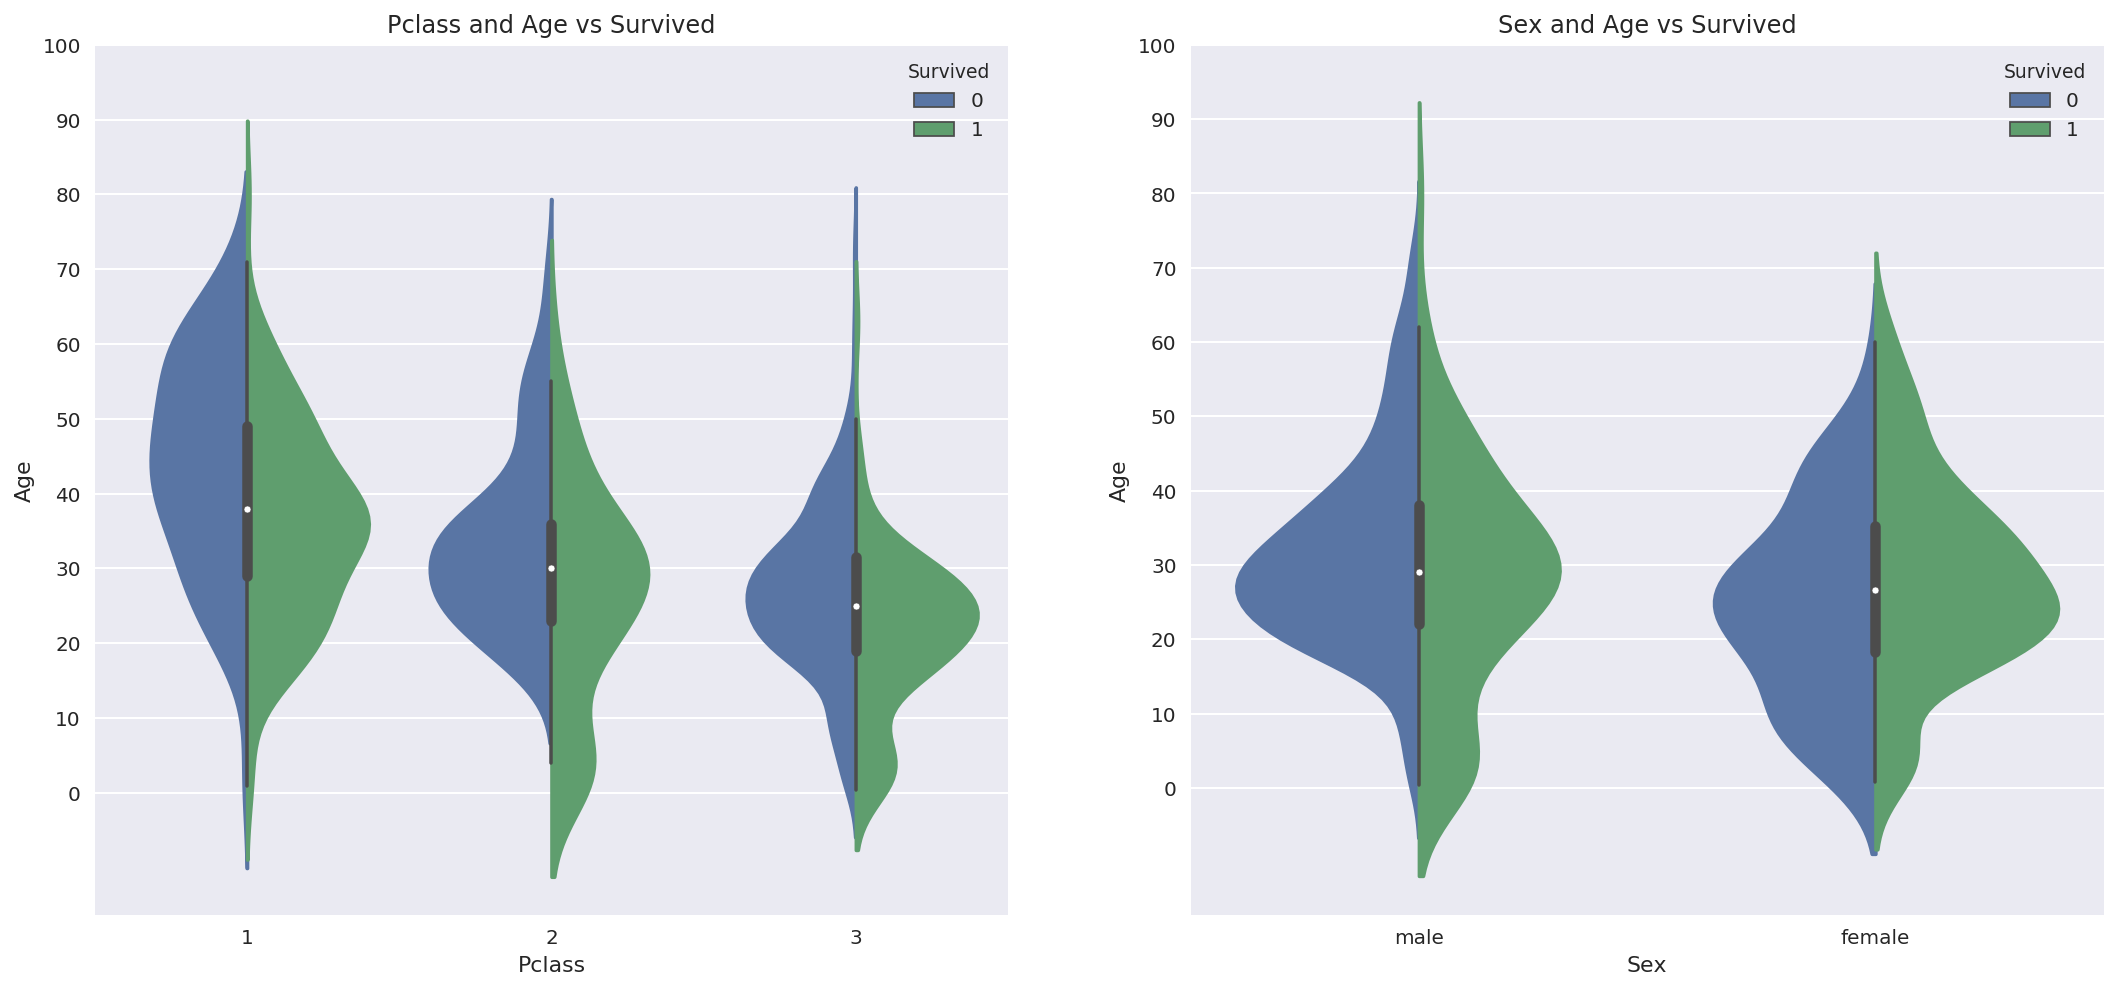

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(
    "Pclass", "Age", hue="Survived", data=train_data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(
    "Sex", "Age", hue="Survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

### Matplotlib 结合 Pandas 绘图

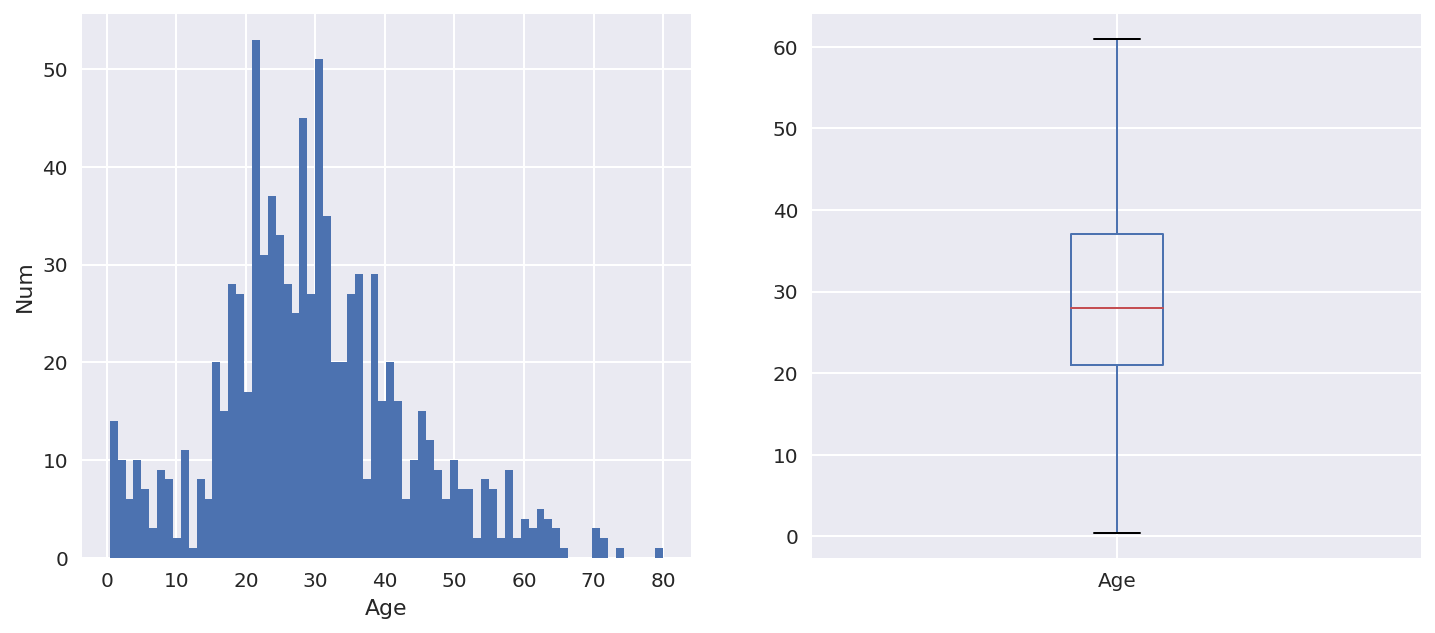

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(121)
# 绘制分布图
train_data['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
# 绘制箱线图
train_data.boxplot(column='Age', showfliers=False)
plt.show()

In [46]:
train_data['Age'].max(),train_data['Age'].min()

(80.0, 0.42)

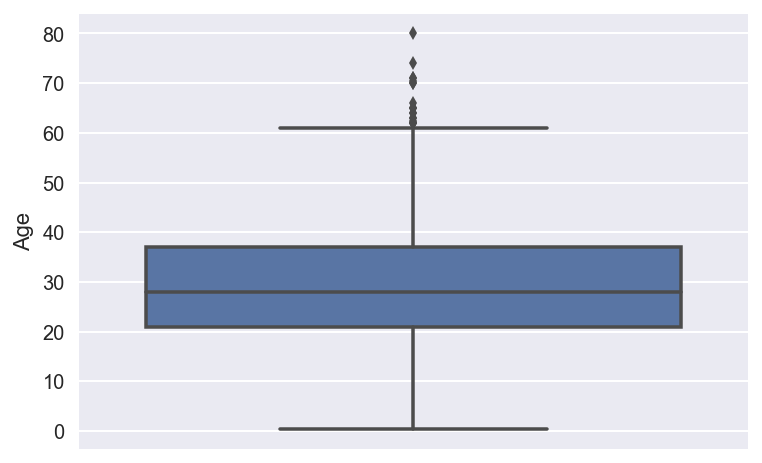

In [51]:
# vertical 表示垂直
sns.boxplot(train_data['Age'], orient="v")
plt.show()

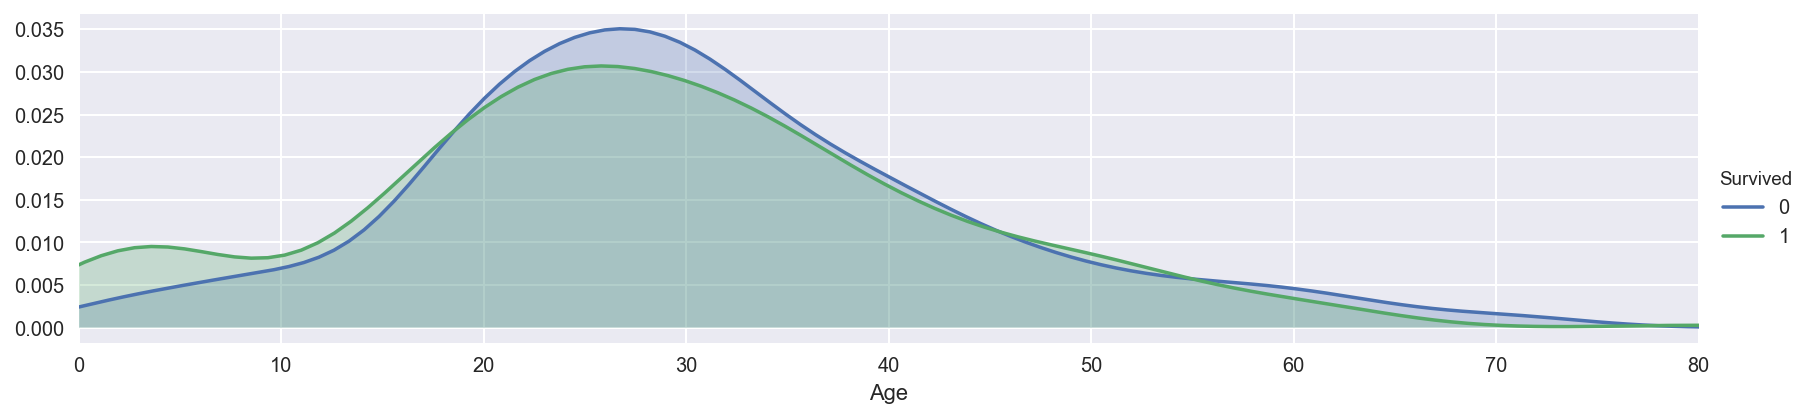

In [52]:
facet = sns.FacetGrid(train_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.show()

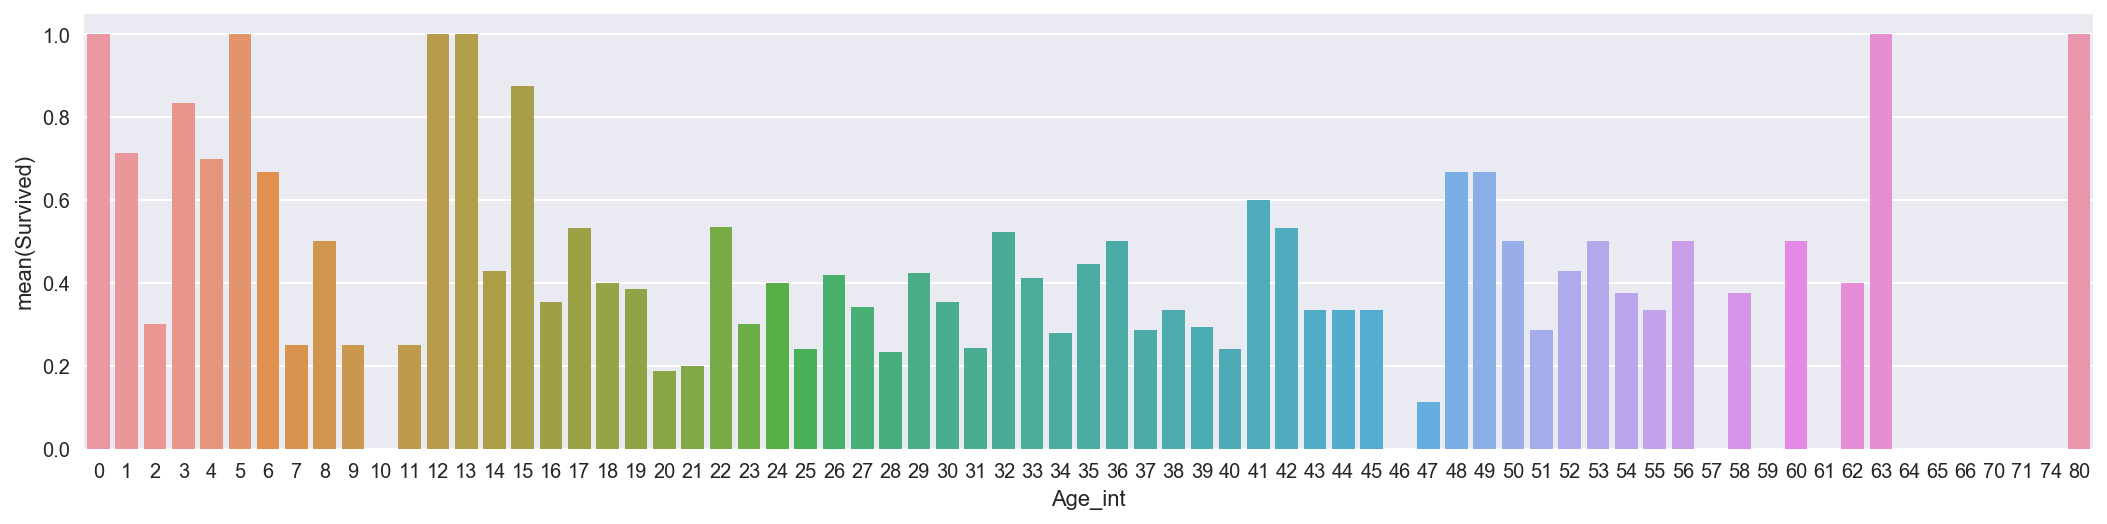

In [53]:
fig, axis1 = plt.subplots(1, 1, figsize=(18, 4))

train_data["Age_int"] = train_data["Age"].astype(int)
average_age = train_data[["Age_int", "Survived"]].groupby(
    ['Age_int'], as_index=False).mean()
sns.barplot(x='Age_int', y='Survived', data=average_age)
plt.show()

In [27]:
train_data['Age'].describe()

count    891.000000
mean      29.652959
std       13.730670
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

## 分箱

In [28]:
bins = [0, 12, 18, 65, 100]

In [30]:
train_data['Age_group'] = pd.cut(train_data['Age'], bins)

In [33]:
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64

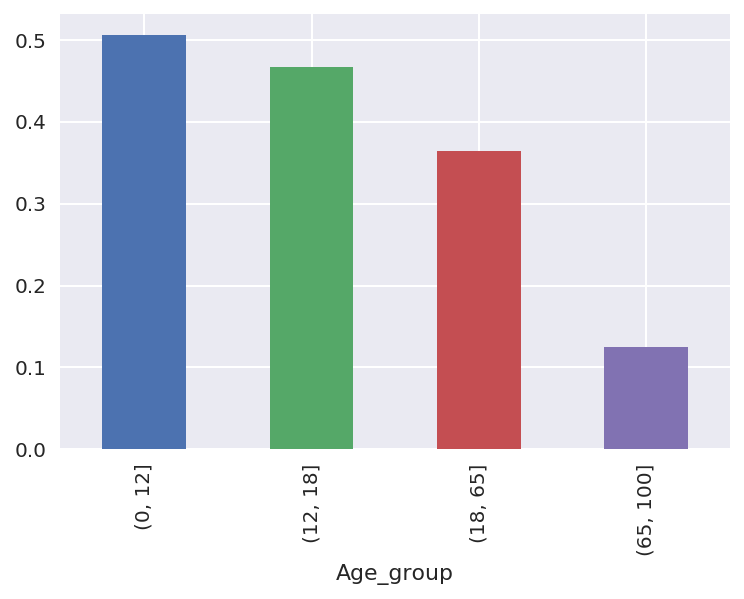

In [34]:
by_age.plot(kind = 'bar')

## 字符串处理

### 抽取出 Title 特征

In [57]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [58]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Countess      1
Jonkheer      1
Sir           1
Lady          1
Mme           1
Don           1
Capt          1
Name: Title, dtype: int64

## 列联表

In [60]:
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


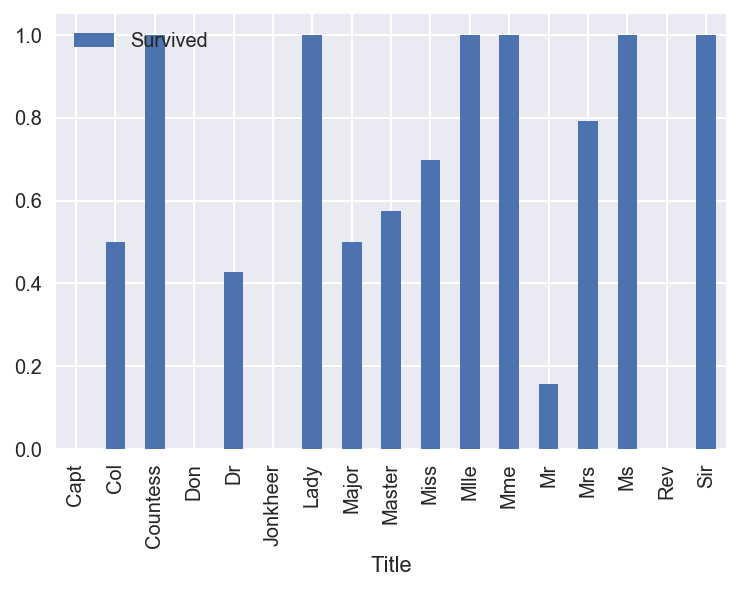

In [61]:
train_data[['Title', 'Survived']].groupby(['Title']).mean().plot.bar()

## `as_index=False` 不能忘掉，注意，此时 index 就是自动生成的数字索引

In [77]:
Title_df = train_data[['Title', 'Survived']].groupby(
    ['Title'], as_index=False).mean()
Title_df

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


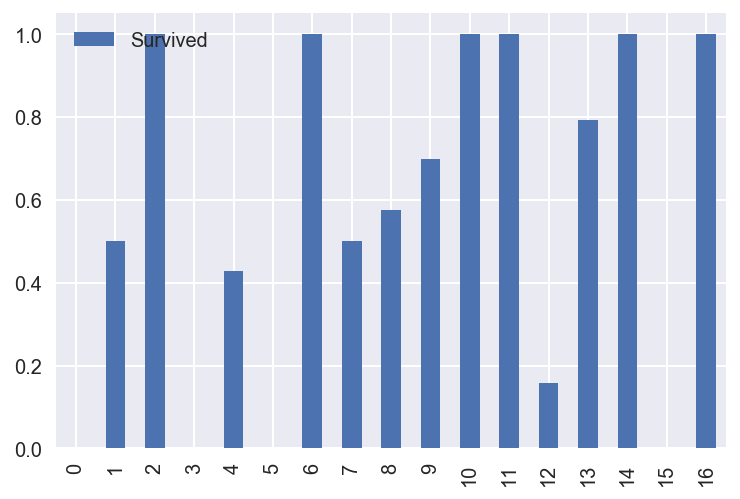

In [78]:
Title_df.plot.bar()
plt.show()

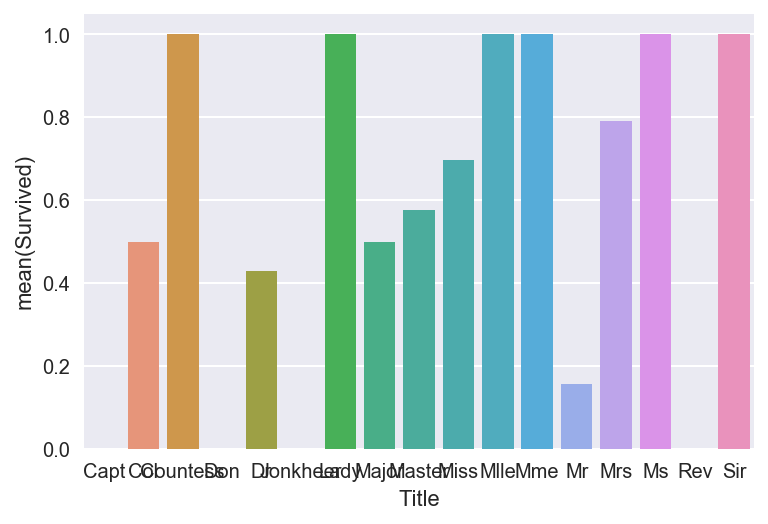

In [79]:
# 不能用
sns.barplot(x='Title', y='Survived', data=Title_df)

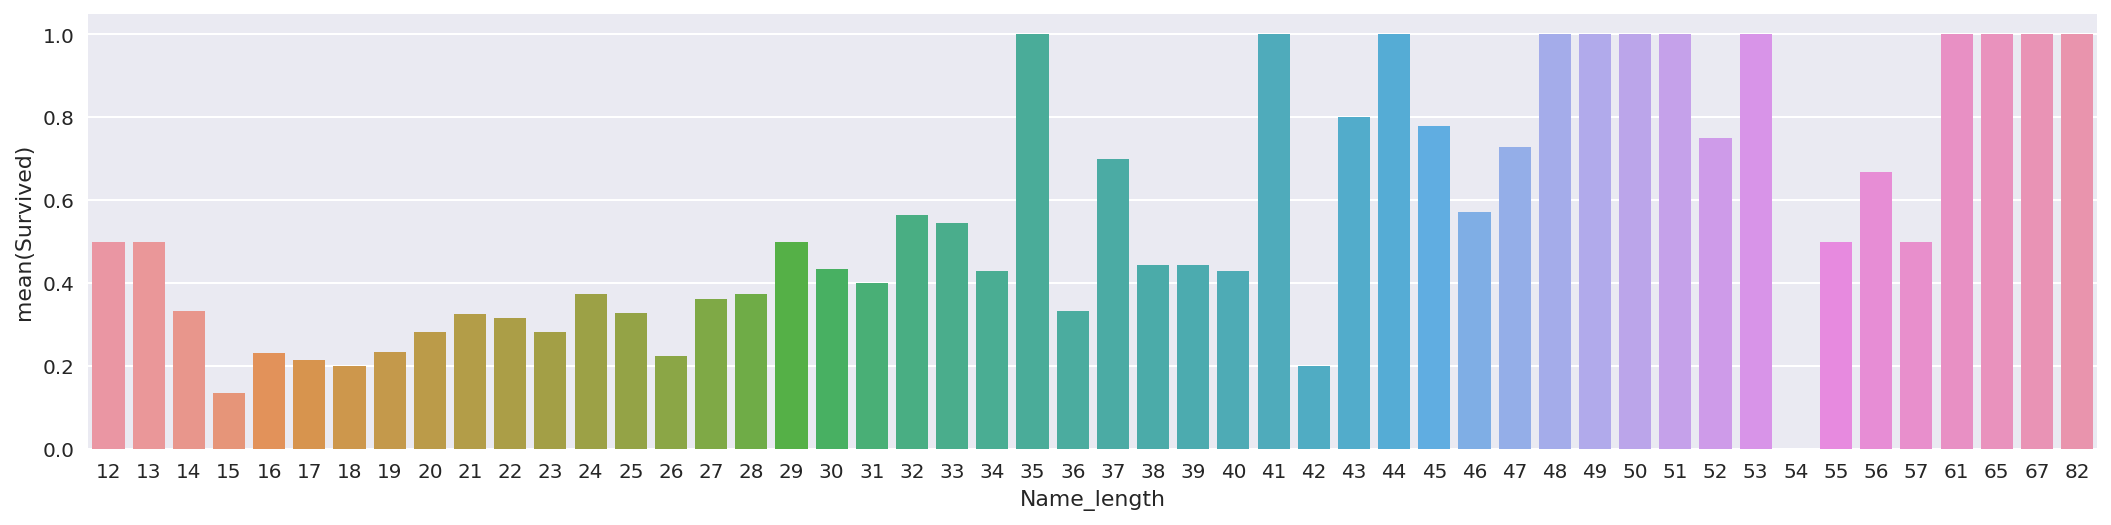

In [43]:
fig, axis1 = plt.subplots(1, 1, figsize=(18, 4))

train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length', 'Survived']].groupby(
    ['Name_length'], as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=name_length)

In [44]:
# 将数据分为有兄弟姐妹的和没有兄弟姐妹的两组：
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

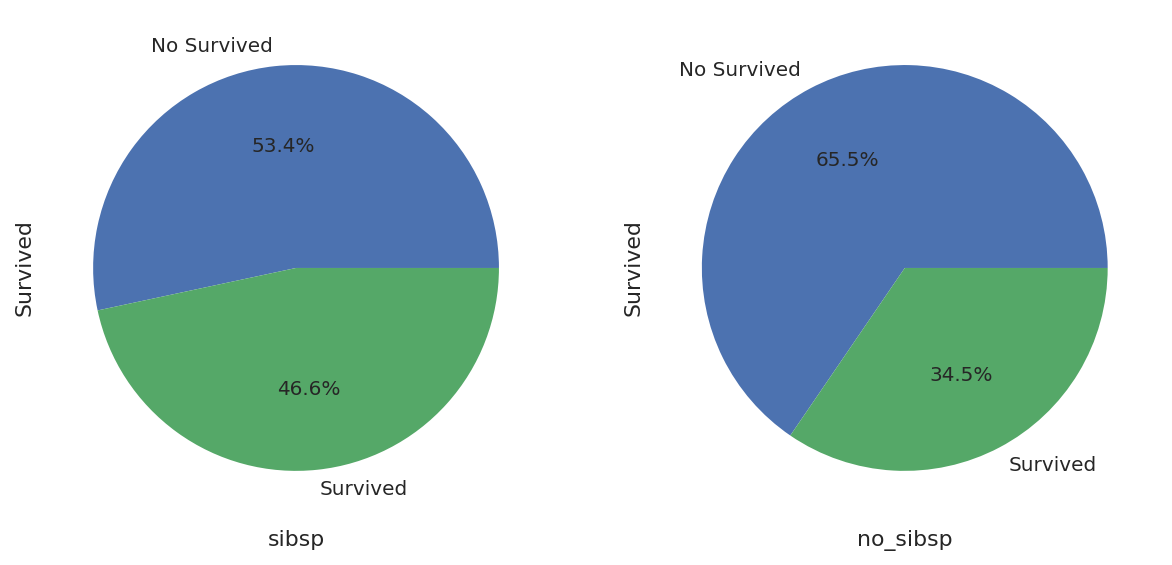

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()

In [52]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

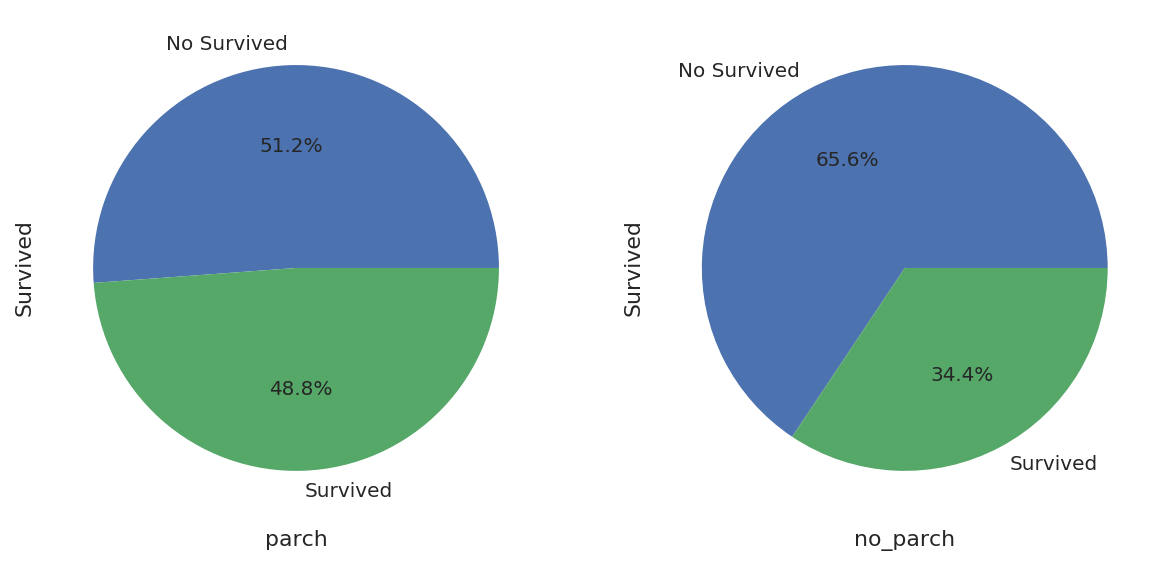

In [48]:
parch_df = train_data[train_data['Parch'] != 0]
no_parch_df = train_data[train_data['Parch'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('parch')

plt.subplot(122)
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_parch')

plt.show()

Text(0.5, 1.0, 'SibSp and Survived')

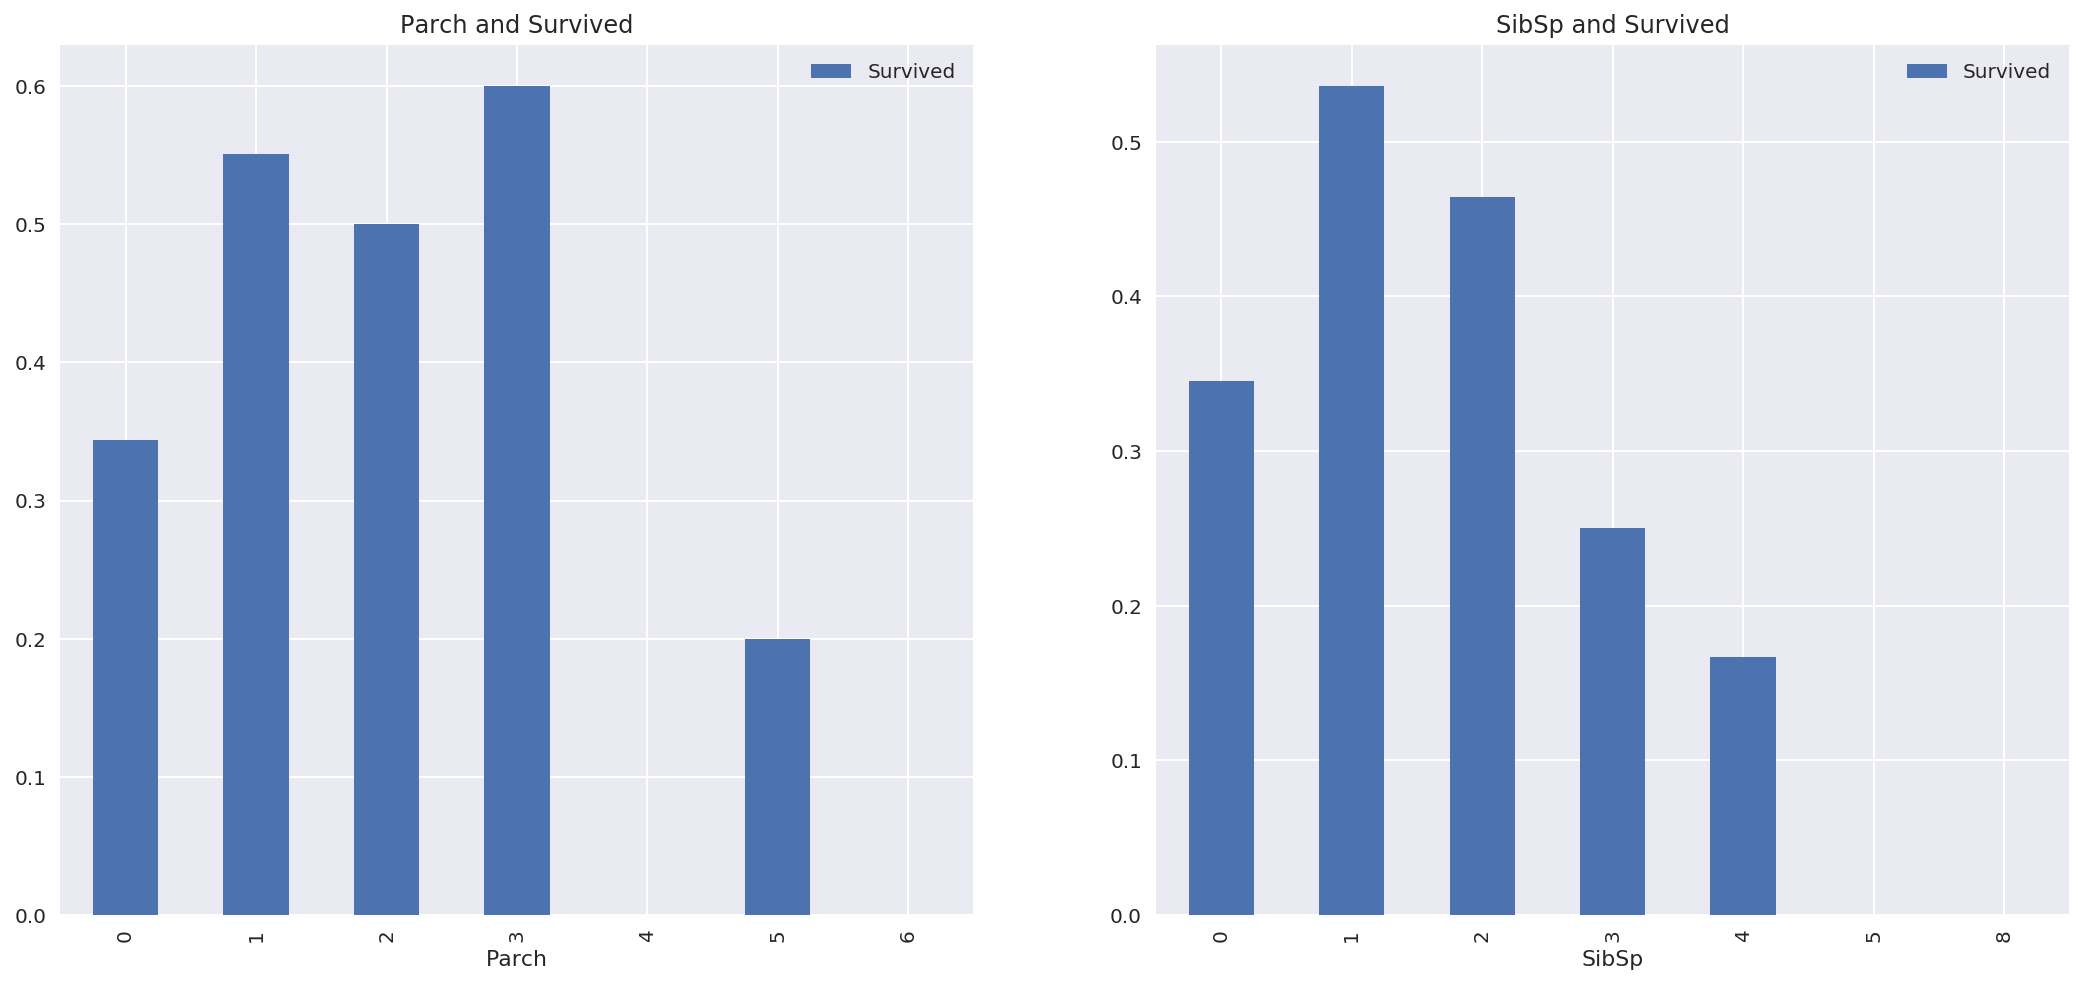

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
train_data[['Parch', 'Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')

### 提取“家庭人数”特征

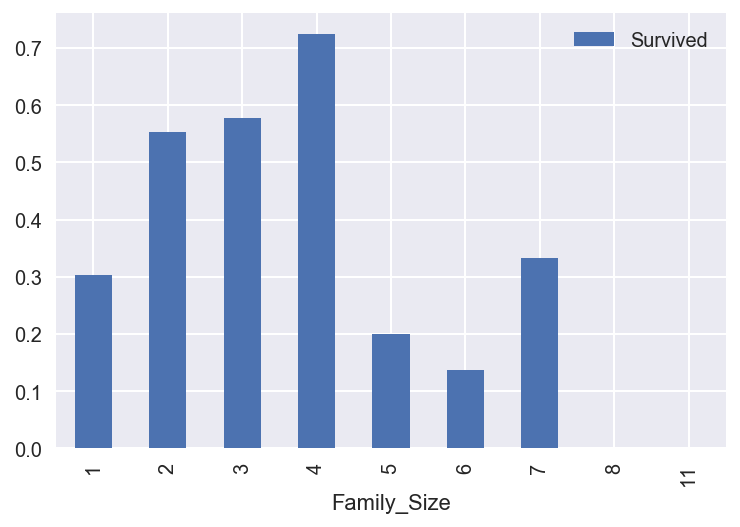

In [80]:
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp'] + 1
train_data[['Family_Size', 'Survived']].groupby(['Family_Size']).mean().plot.bar()

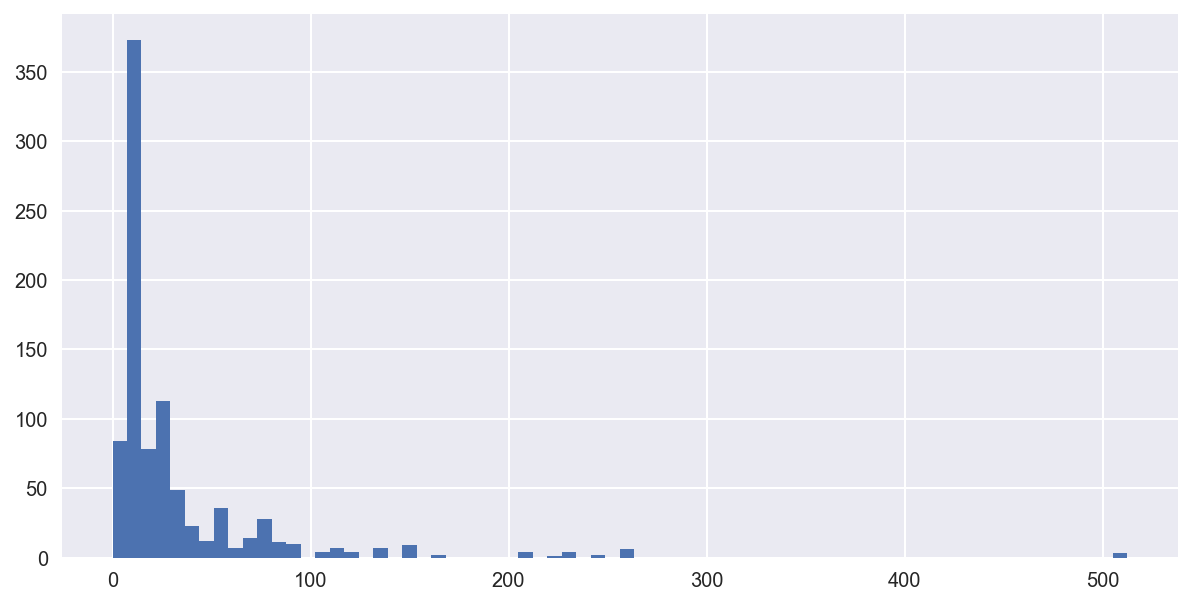

In [81]:
plt.figure(figsize=(10,5))
train_data['Fare'].hist(bins = 70)
plt.show()

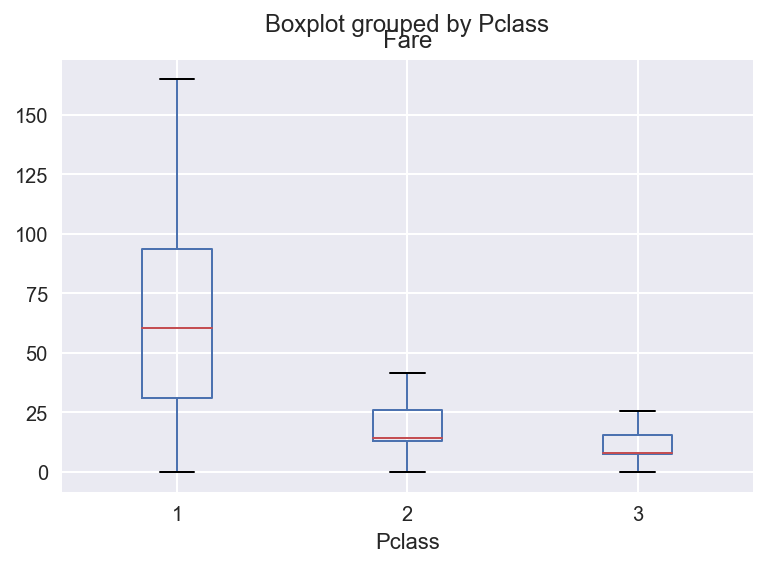

In [82]:
train_data.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

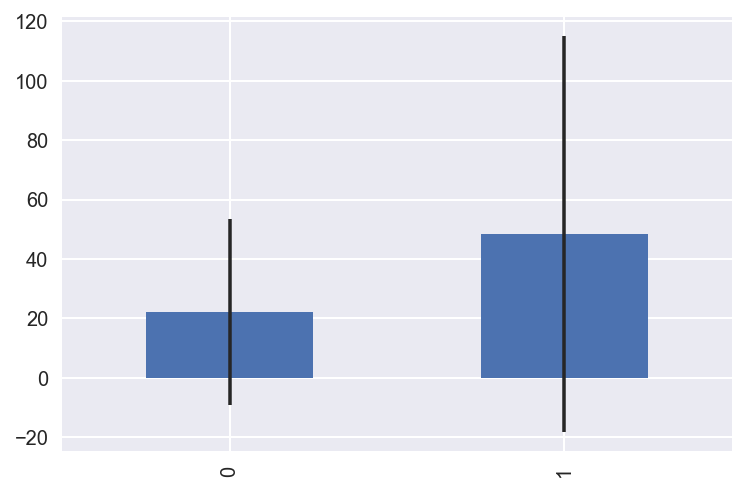

In [83]:
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

plt.show()

In [84]:
average_fare

,0
0,22.117887
1,48.395408


In [85]:
std_fare

,0
0,31.388207
1,66.596998


In [86]:
s = pd.Series(['a1', 'b2', 'c3'])
type(s.str.extract(r'[ab](\d)', expand=False))
type(s.str.extract(r'[ab](\d)', expand=True))

pandas.core.frame.DataFrame

### 把离散型变量独热编码化

In [87]:
embark_dummies = pd.get_dummies(train_data['Embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['Embarked'], axis=1, inplace=True)

In [88]:
# Replace missing values with "U0"
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]

In [89]:
train_data['CabinLetter'].value_counts().sort_index()

0    687
1     59
2     32
3      4
4     33
5     15
6     47
7     13
8      1
Name: CabinLetter, dtype: int64

In [90]:
train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()).value_counts().sort_index()

A     15
B     47
C     59
D     33
E     32
F     13
G      4
T      1
U    687
Name: Cabin, dtype: int64

In [91]:
train_data['Age'].describe()

count    891.000000
mean      29.662966
std       13.739215
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data['Age_scaled'] = scaler.fit_transform(train_data['Age'].values.reshape((-1, 1)))

In [93]:
train_data['Age_scaled'].describe()

count    8.910000e+02
mean     1.475313e-16
std      1.000562e+00
min     -2.129626e+00
25%     -6.308826e-01
50%     -1.211059e-01
75%      5.343213e-01
max      3.665807e+00
Name: Age_scaled, dtype: float64

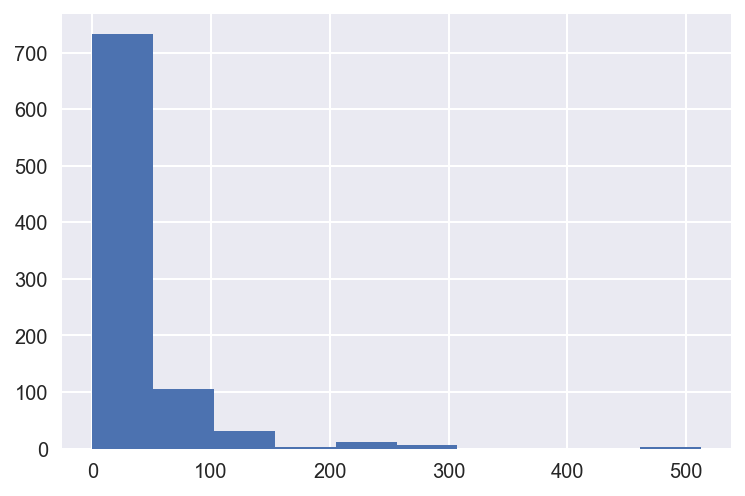

In [95]:
train_data['Fare'].hist()
plt.show()

In [96]:
train_data['Fare_bin'] = pd.qcut(train_data['Fare'], 5)
train_data['Fare_bin'].head()

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [142]:
train_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]

In [143]:
fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))
train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)